# Evaluating House Prediction Models

In the last notebook, you fit different machine learning models to predict house prices. In this notebook, you will evaluate these models by estimating the error using cross-validation.

In [36]:
import pandas as pd
df = pd.read_table("data/housing.tsv", sep="\t")
df.head()

,PID,Gr Liv Area,Bedroom AbvGr,Full Bath,Half Bath,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,1656,3,1,0,20,RL,141.0,31770,Pave,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,896,2,1,0,20,RH,80.0,11622,Pave,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,1329,3,1,1,20,RL,81.0,14267,Pave,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,2110,3,2,1,20,RL,93.0,11160,Pave,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,1629,3,2,1,60,RL,74.0,13830,Pave,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Exercise 1a

In the last Colab, you fit a $10$-nearest neighbors model that predicts the **SalePrice** using **Gr Liv Area**, **Bedroom AbvGr**, and **Full Bath** as inputs.

Calculate the training RMSE of this model.

_Hint:_ Feel free to copy and paste the model from the last Colab!

In [37]:
# copy and paste from 5.2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# define the test dataset
X_test = pd.DataFrame([
    {"Gr Liv Area": 1800,
     "Bedroom AbvGr": 3,
     "Full Bath": 2}
])

# define the training dataset
X_train = df[["Gr Liv Area", "Bedroom AbvGr", "Full Bath"]]
y_train = df["SalePrice"]

# create the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=10)
)

pipeline.fit(X=X_train, y=y_train)
pipeline.predict(X=X_test)

array([239490.])

In [38]:
# get the training RMSE of the k-nn model
from sklearn.metrics import root_mean_squared_error
y_train_ = pipeline.predict(X_train)
rmse = root_mean_squared_error(y_true=y_train, y_pred=y_train_)
rmse

44034.73880312454

## 📊 RMSE(Root Mean Square Error)란? by Copilot

RMSE는 예측 모델의 정확도를 평가할 때 자주 사용되는 지표입니다. 특히 회귀 분석이나 머신러닝 모델에서 실제 값과 예측 값 사이의 차이를 정량적으로 측정할 때 유용합니다.

---

### 📐 정의 및 수식

**RMSE는 평균 제곱 오차(MSE)의 제곱근**입니다. 즉, 예측 값과 실제 값 사이의 오차를 제곱해서 평균을 낸 뒤, 그 평균의 제곱근을 구한 값입니다.

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

- $y_i$: 실제 값
- $\hat{y}_i$: 예측 값
- $n$: 데이터 포인트의 수

---

### ✅ RMSE의 특징

- **단위 일치**: RMSE는 원래 데이터와 같은 단위를 가지므로 해석이 직관적입니다.
- **오차에 민감**: 큰 오차에 더 큰 패널티를 주기 때문에 이상치(outlier)에 민감합니다.
- **직관적 해석**: RMSE가 작을수록 모델의 예측이 실제 값에 가까운 것입니다.

---

### 📌 계산 예시

예를 들어, 실제 값이 `[3, 5, 2, 7]`이고 예측 값이 `[2.5, 5.3, 2.1, 6.8]`이라면:

1. 오차: `[0.5, -0.3, -0.1, 0.2]`
2. 제곱: `[0.25, 0.09, 0.01, 0.04]`
3. 평균 제곱 오차(MSE): `(0.25 + 0.09 + 0.01 + 0.04) / 4 = 0.0975`
4. RMSE: `√0.0975 ≈ 0.312`

---

### 🤔 RMSE vs 다른 지표 비교

| 지표 | 설명 | 장점 | 단점 |
|------|------|------|------|
| **RMSE** | 평균 제곱 오차의 제곱근 | 이상치에 민감, 직관적 단위 | 이상치에 너무 민감할 수 있음 |
| **MAE** (Mean Absolute Error) | 절대 오차의 평균 | 이상치에 덜 민감 | 미분 불가능 |
| **MSE** (Mean Squared Error) | 제곱 오차의 평균 | 계산이 간단 | 단위가 원래 데이터와 다름 |

---

### 🧠 RMSE를 사용할 때

- **정확한 예측이 중요한 경우**: 가격 예측, 수요 예측 등에서 RMSE는 예측의 정밀도를 잘 나타냅니다.
- **이상치가 중요한 경우**: 큰 오차를 강조하고 싶을 때 RMSE가 적합합니다.




_INTERPRET THE RMSE._

- SalePrice의 예측값이 $239490 이고 RMSE(평균제곱근오차)가 $44034.73880312454
- 예측 오차가 상당히 크다는 것을 알 수 있음

## Exercise 1b

Estimate the test RMSE of this $10$-nearest neighbors model using cross-validation.

_Hint:_ Think about what code you can reuse from Exercise 1a.

In [39]:
import numpy as np

np.random.seed(0)
inds_train_set = np.random.choice(X_train.index, size=len(X_train) // 2, replace=False)
df_train_set = df.loc[inds_train_set]
df_val_set = df.drop(inds_train_set, axis="rows")

# define the training dataset and validation dataset
X_train_set, y_train_set = df_train_set[["Gr Liv Area", "Bedroom AbvGr", "Full Bath"]], df_train_set["SalePrice"]
X_val_set, y_val_set = df_val_set[["Gr Liv Area", "Bedroom AbvGr", "Full Bath"]], df_val_set["SalePrice"]

In [40]:
# get the test RMSE of the k-nn model
from sklearn.metrics import root_mean_squared_error
pipeline.fit(X_train_set, y_train_set)
y_val_set_ = pipeline.predict(X_val_set)
rmse = root_mean_squared_error(y_true=y_val_set, y_pred=y_val_set_)
rmse

50634.77924440969

_Interpret the test RMSE and compare it to the training RMSE._
- 훈련오차 $44034.73880312454, 검증오차 $50634.77924440969
- 훈련 시 사용된 데이터가 들어오지 않은 경우, 예측하는 값에 평균 $50634.77924440969 의 오차 존재

## Exercise 2a

In the last Colab, you fit a $10$-nearest neighbors model that predicts the **SalePrice** using a mix of categorical and quantitative inputs:

- **House Style**
- **Neighborhood**
- **Gr Liv Area**
- **Bedroom AbvGr**
- **Full Bath**

Use cross-validation to estimate the test RMSE of this model. You will get an error. Can you figure out why this error occurs?

*Hint:* Check out the `handle_unknown` argument in [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

<!-- [You can avoid the error by initializing `OneHotEncoder` with the option `handle_unknown="ignore"`.] -->

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn import set_config

# numerical variable: "Gr Liv Area", "Bedroom AbvGr", "Full Bath"
# categorical variable: "House Style", "Neighborhood"
numerical_variables = ["Gr Liv Area", "Bedroom AbvGr", "Full Bath"]
categorical_variables = ["House Style", "Neighborhood"]

# define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_variables),
        ("cat", OneHotEncoder(handle_unknown="ignore", dtype=int), categorical_variables)
    ]
)

# create the pipeline
model_pipeline_KNN = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsRegressor(n_neighbors=10))
])

# display the diagram
set_config(display="diagram")
model_pipeline_KNN

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
# define the training dataset and validation dataset
X_train_set, y_train_set = df_train_set[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "House Style", "Neighborhood"]], df_train_set["SalePrice"]
X_val_set, y_val_set = df_val_set[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "House Style", "Neighborhood"]], df_val_set["SalePrice"]

In [44]:
# get the test RMSE of the k-nn model
from sklearn.metrics import root_mean_squared_error
model_pipeline_KNN.fit(X_train_set, y_train_set)
y_val_set_ = model_pipeline_KNN.predict(X_val_set)
rmse = root_mean_squared_error(y_true=y_val_set, y_pred=y_val_set_)
rmse

40892.866963881366

## Exercise 2b

In the last Colab, you also fit a linear regression model to predict **SalePrice** using the same input features.

Estimate the test RMSE of this linear regression model. Which model do you prefer: $k$-nearest neighbors or linear regression?

_Hint:_ Think about what code you can reuse from Exercise 2a.

In [45]:
from sklearn.linear_model import LinearRegression

# define the pipeline
model_pipeline_LR = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# display the diagram
set_config(display="diagram")
model_pipeline_LR

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
# get the test RMSE of the LR model
from sklearn.metrics import root_mean_squared_error
model_pipeline_LR.fit(X_train_set, y_train_set)
y_val_set_ = model_pipeline_LR.predict(X_val_set)
rmse = root_mean_squared_error(y_true=y_val_set, y_pred=y_val_set_)
rmse

39426.87046696412

_Which model is better: $k$-nearest neighbors or linear regression?_

- Cross validation 결과
    - k-NN 모델: 40892.866963881366
    - LR 모델: 39426.87046696412

따라서 Linear Regression 모델이 좀 더 좋음

## Exercise 3a

In the exercises above, we used $k=10$ nearest neighbors, but we could have chosen other values of $k$.

Write a function that calculates the training error for a given value of $k$. (Skeleton code for the function has been provided for you.)

The code below calls your function for values of $k$ between 1 and 35 and stores the results in a Pandas `Series` called `training_errors`.

_Hint:_ Think about what code you can reuse from Exercise 2a.

In [52]:
from sklearn.metrics import root_mean_squared_error

X_train_set, y_train_set = df[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "House Style", "Neighborhood"]], df["SalePrice"]

def calculate_training_error(k):
        # TODO: define a k-nearest neighbors model
    model_pipeline_KNN = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", KNeighborsRegressor(n_neighbors=k))
    ])

    # TODO: calculate the training MSE of this model
    model_pipeline_KNN.fit(X_train_set, y_train_set)
    y_train_set_ = model_pipeline_KNN.predict(X_train_set)
    mse = root_mean_squared_error(y_true=y_train_set, y_pred=y_train_set_)
    
    return mse

ks = range(1, 35)
training_errors = pd.Series(ks, index=ks).apply(calculate_training_error)
training_errors

1      7086.906435
2     21783.246272
3     25581.512797
4     26988.046971
5     28447.080831
6     30012.576712
7     31235.427145
8     31694.206242
9     32468.752908
10    33017.738822
11    33549.290742
12    33945.300763
13    34312.813190
14    34718.123000
15    34865.928329
16    35060.721209
17    35312.090036
18    35431.642949
19    35600.720050
20    35817.174625
21    36033.460465
22    36192.389468
23    36307.908176
24    36449.112958
25    36555.371162
26    36757.092484
27    36952.138963
28    37114.094794
29    37290.927714
30    37375.877164
31    37451.643309
32    37578.322851
33    37711.022917
34    37848.696228
dtype: float64

## Exercise 3b

Now, write a function that estimates the test RMSE for a given value of $k$. (The skeleton code for the function has been provided for you.)

The code below calls this function for values of $k$ between 1 and 35 and stores the results in a Pandas `Series` called `test_errors`.

In [53]:
from sklearn.metrics import root_mean_squared_error

# define the training dataset and validation dataset
X_train_set, y_train_set = df_train_set[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "House Style", "Neighborhood"]], df_train_set["SalePrice"]
X_val_set, y_val_set = df_val_set[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "House Style", "Neighborhood"]], df_val_set["SalePrice"]

def estimate_test_error(k):
    # TODO: define a k-nearest neighbors model
    model_pipeline_KNN = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", KNeighborsRegressor(n_neighbors=k))
    ])

    # TODO: use cross-validation to estimate the test error
    model_pipeline_KNN.fit(X_train_set, y_train_set)
    y_val_set_ = model_pipeline_KNN.predict(X_val_set)
    rmse = root_mean_squared_error(y_true=y_val_set, y_pred=y_val_set_)
    return rmse 

ks = range(1, 35)
test_errors = pd.Series(ks, index=ks).apply(
    estimate_test_error)
test_errors

1     43686.059086
2     39983.064683
3     38728.691408
4     38473.824158
5     38571.860776
6     39383.575985
7     40115.806797
8     40190.285045
9     40464.876102
10    40892.866964
11    40923.845426
12    40842.681013
13    41135.536924
14    41525.554396
15    41697.248526
16    41689.554244
17    41959.701056
18    42157.793462
19    42247.203748
20    42426.497197
21    42633.905089
22    42556.581592
23    42614.961699
24    42687.836190
25    42788.428996
26    42768.227323
27    42771.218083
28    42944.724932
29    43038.981421
30    43058.766634
31    43196.917275
32    43348.744349
33    43616.018465
34    43848.034644
dtype: float64

## Exercise 3c

The code below graphs the training and test errors that you calculated above (as functions of $k$).

Run the cell below and answer the following questions:

- How does training error change as $k$ decreases? Why does this make sense?
- How does test error change as $k$ changes?
- What is the best value of $k$?

Text(0, 0.5, 'RMSE')

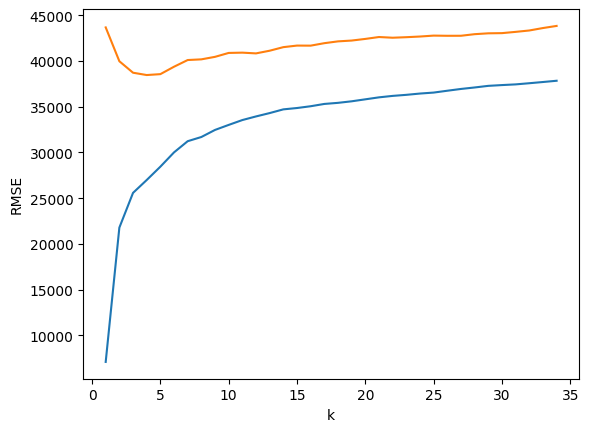

In [54]:
ax = training_errors.plot.line()
test_errors.plot.line(ax=ax)
ax.set_xlabel("k")
ax.set_ylabel("RMSE")

Q1. How does training error change as $k$ decreases? Why does this make sense?

A1. k가 줄어들 때마다 감소하다가 k = 5 부근에서 극적으로 감소함. k가 너무 작을 때는 overfitting이 일어나고, k가 어느 이상 늘어나면 underfitting이 발생함 

Q2. How does test error change as $k$ changes?

A2. k값을 기준으로 0 ~ 4 구간에서는 감소, 5 ~ 35 구간에서는 증가함

Q3. What is the best value of $k$?

A3. test error가 최소: 가 되는 k = 4가 best value?
(추후 수정 필요)
